Данная таблица построена на основе данных с сервисов каршеринга. 
City - Services_city - many-to-many
Car - Services_cars - many-to-many
Services - Penalty - one-to-many

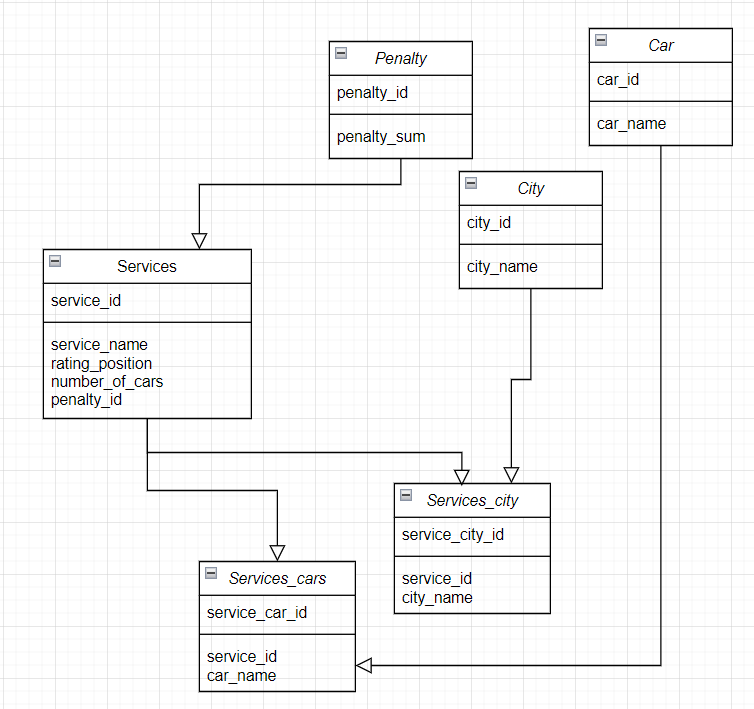

In [3]:
import sqlite3
import pandas as pd

In [4]:
#Создаем БД
sql = sqlite3.connect('data/Carsharing.bd')

In [5]:
#Прочитаем каждую таблицу из листов файла excel
excel_reader = pd.ExcelFile('data/homework.xlsx')
df_services = excel_reader.parse('Services')
df_cities = excel_reader.parse('City')
df_cars = excel_reader.parse('Car')
df_penalties = excel_reader.parse('Penalty')
df_service_car = excel_reader.parse('Services_cars')
df_service_city = excel_reader.parse('Services_city')

In [13]:
#Внесем таблицы в БД
df_services.to_sql('Services', sql, index_label='id', if_exists = 'replace')
df_cities.to_sql('City', sql, index_label='id', if_exists = 'replace')
df_cars.to_sql('Car', sql, index_label='id', if_exists = 'replace')
df_penalties.to_sql('Penalty', sql, index_label='id', if_exists = 'replace')
df_service_car.to_sql('Services_cars', sql, index_label='id', if_exists = 'replace')
df_service_city.to_sql('Services_city', sql, index_label='id', if_exists = 'replace')

31

#### Уровень 1
Фильтрация данных по какому-то значению

In [16]:
#Отфильтруем три самых лучших сервиса на рынке каршеринга
query = '''
SELECT * FROM Services
WHERE rating<=3
'''
pd.read_sql(query, sql)

,id,service_id,service_name,rating,number_of_cars,penalty_id
0,0,0,Яндекс.Драйв,1,16000,0
1,1,1,Делимобиль,2,12000,0
2,2,2,BelkaCar,3,5000,2


#### Уровень 2
Написать запрос на объединение двух или более таблиц

In [28]:
#Объединим сервисы каршеринга с таблицей городов, где они используются и отфильтруем только Москву и Питер
query = '''
SELECT SC.service_id, SC.city_name, S.service_name FROM Services_city AS SC
INNER JOIN Services AS S ON SC.service_id = S.service_id
WHERE city_name = 'Москва' OR city_name = 'Санкт-Петербург'
ORDER BY city_name
'''
pd.read_sql(query, sql)

,service_id,city_name,service_name
0,0,Москва,Яндекс.Драйв
1,1,Москва,Делимобиль
2,2,Москва,BelkaCar
3,6,Москва,YouDrive
4,7,Москва,Bumerang
5,8,Москва,RENTMEE
6,0,Санкт-Петербург,Яндекс.Драйв
7,1,Санкт-Петербург,Делимобиль
8,8,Санкт-Петербург,RENTMEE


#### Уровень 3
Написать запрос, который посчитает какую-то сложную аналитику по БД, используя как можно больше таблиц. Построить графики и сделать выводы

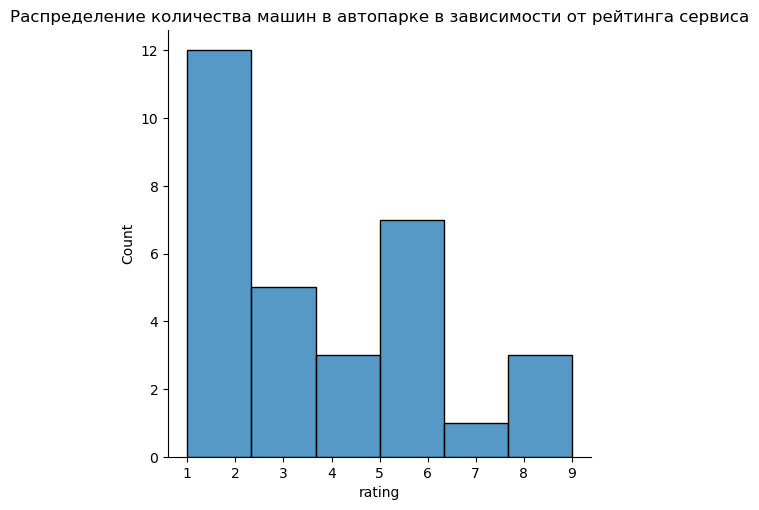

In [41]:
import seaborn as sns

# Например, узнаем, коррелирует ли популярность и успех сервиса каршеринга от количества машин
query = '''
SELECT S.service_name, S.rating, S.number_of_cars FROM Services_city AS SC
INNER JOIN Services AS S ON SC.service_id = S.service_id
'''
df_data = pd.read_sql(query, sql)
df_data_plt = sns.displot(data = df_data, x = df_data['rating']) ;
df_data_plt.set(title = 'Распределение количества машин в автопарке в зависимости от рейтинга сервиса') ;
# Чем успешнее серивс каршеринга, тем он популярнее - тем больше машин ему необходимо 

In [53]:
# Посмотрим, в каких городах рынок каршеринговых сервисов не переполнен
query = '''
SELECT SC.city_name AS City, count(S.service_name) AS Services_number FROM Services_city AS SC
INNER JOIN Services AS S ON SC.service_id = S.service_id
GROUP BY City
ORDER BY Services_number
'''
pd.read_sql(query, sql)

#В южной части страны не так развита каршеринговая деятельность, с учетом текущих цен на автомобили и ставок 
#стоит задуматься о возможном открытии новых сервисов аренды авто

,City,Services_number
0,Иркутск,1
1,Казань,1
2,Нижний Новгород,1
3,Новосибирск,1
4,Ростов-на-Дону,1
5,Самара,1
6,Тула,1
7,Челябинск,1
8,Анапа,2
9,Волгоград,2
